# Charging Infrastructures for EVs and Fuel prices in France


## Introduction

### Is the fuel price in France affecting the number of charging stations for electric vehicles?

Electric vehicles (EVs) are becoming more and more popular in the world thereby resulting in an increase in demand for charging stations. We already know that fuel prices are one of the driving factors for the adaptation of electric vehicles but is it also affecting the number of charging stations ? In this notebook, we will try to dig deeper into this question by analyzing the fuel prices and the number of charging stations in France.

We will use the data generated by data pipeline in the previous notebook to analyze the relationship between the fuel prices and the number of charging stations in France.

## Used Data

Although the data from previous pipeline is generated, it had the following problems:
- Too many columns to work with
- Column names were in French
- The data was not clean

Therefore, changes to existing pipeline were made to extract, transform and load the data in a more structured way. The data was cleaned and the columns were reduced to only the necessary ones. The column names were also changed to English for better understanding. And finally, the timestamp was converted to a more readable format of year and month and date.

### Load the data

In [13]:
import pandas as pd
import sqlite3
import matplotlib.pyplot as plt


In [14]:
conn = sqlite3.connect('../data/ev-infra.sqlite')
ev_infra_data = pd.read_sql_query("SELECT * FROM ev", conn)
conn.close()
conn = sqlite3.connect('../data/fuel-prices.sqlite')
fuel_prices_data = pd.read_sql_query("SELECT * FROM fuel", conn)
conn.close()

In [15]:
ev_infra_data.head(2)

,station_name,station_id,station_service_start_date,date_modified,last_modified,created_at
0,Hotel saint alban,FR000011062174,2022-03-02 00:00:00,2022-04-25 00:00:00,2024-01-19 00:00:00,2022-05-12 00:00:00
1,Hôtel Restaurant Campanile Nogent-sur-Marne,FR000012292701,2022-02-22 00:00:00,2022-05-12 00:00:00,2024-01-19 00:00:00,2022-05-12 00:00:00


In [16]:
fuel_prices_data.head(2)

,date_modified,price_id,price_value,price_name
0,2024-06-29 00:00:00,2.0,1.795,SP95
1,2024-06-21 00:00:00,6.0,1.869,SP98


EV charging stations data:
We are particularly interested in the number of charging stations that were installed in France over the years. Hence the only columns we are interested in are count and station_service_start_date.
Fuel prices data:
We are interested in the fuel prices in France over the years. Hence the only columns we are interested in are date_modified and price_value. We try to restrict the fuel prices to only gasoline which is indicated as 'Gazole' in the data.

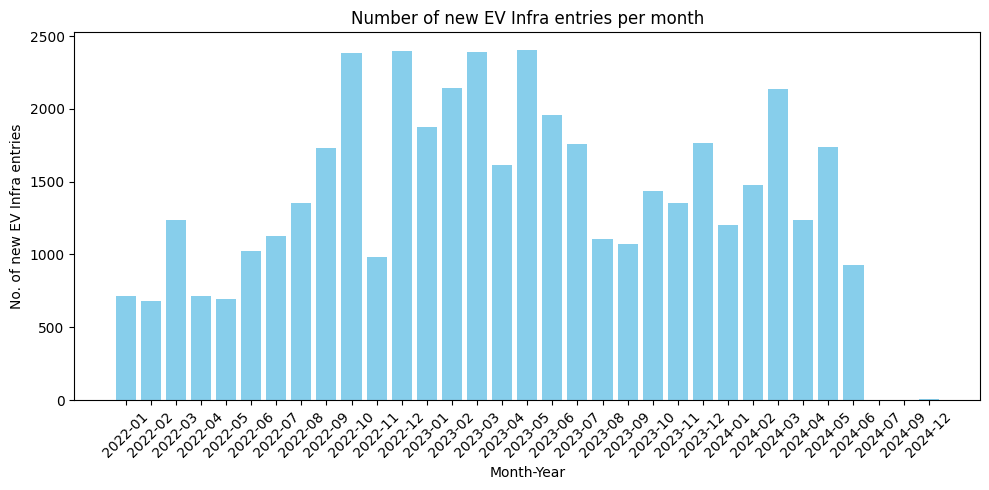

In [17]:

ev_infra_data['station_service_start_date'] = pd.to_datetime(ev_infra_data['station_service_start_date'], errors='coerce')
ev_infra_data['year_month'] = ev_infra_data['station_service_start_date'].dt.to_period('M')
# filter the last 5 years of data
ev_infra_data = ev_infra_data[ev_infra_data['year_month'] >= '2022-01']
entry_counts = ev_infra_data.groupby('year_month').size().reset_index(name='count')
entry_counts['year_month'] = entry_counts['year_month'].astype(str)

# plot the number of entries per month
plt.figure(figsize=(10, 5))
plt.bar(entry_counts['year_month'], entry_counts['count'], color='skyblue')
plt.xlabel('Month-Year')
plt.ylabel('No. of new EV Infra entries')
plt.title('Number of new EV Infra entries per month')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

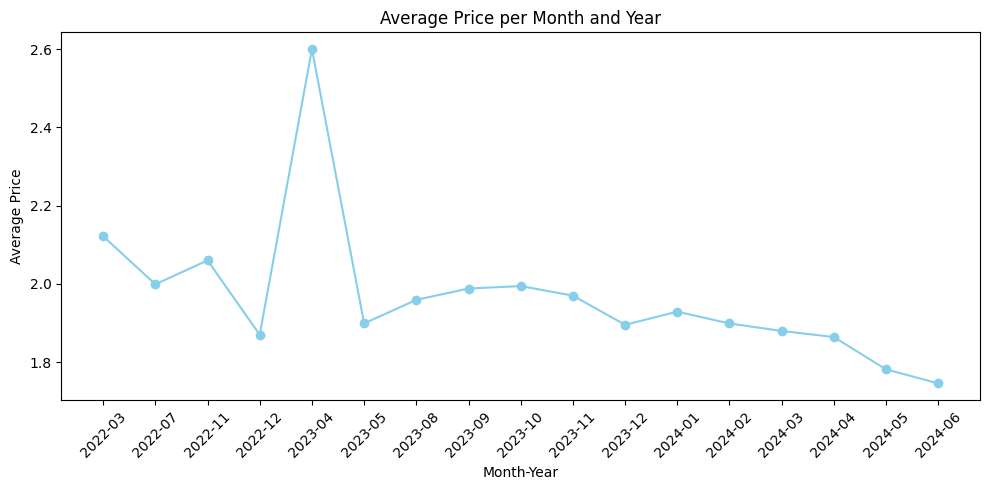

In [18]:
fuel_prices_data = fuel_prices_data[fuel_prices_data['price_name'] == 'Gazole']

fuel_prices_data['date_modified'] = pd.to_datetime(fuel_prices_data['date_modified'], errors='coerce')
fuel_prices_data['year_month'] = fuel_prices_data['date_modified'].dt.to_period('M')
# filter the last 5 years of data
fuel_prices_data = fuel_prices_data[fuel_prices_data['year_month'] >= '2022-01']
average_prices = fuel_prices_data.groupby('year_month')['price_value'].mean().reset_index()
average_prices['year_month'] = average_prices['year_month'].astype(str)

plt.figure(figsize=(10, 5))
plt.plot(average_prices['year_month'], average_prices['price_value'], marker='o', linestyle='-', color='skyblue')
plt.xlabel('Month-Year')
plt.ylabel('Average Price')
plt.title('Average Price per Month and Year')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

C:\Users\prabh\AppData\Local\Temp\ipykernel_25928\2201027025.py:9: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax1.set_xticklabels(entry_counts['year_month'], rotation=45)


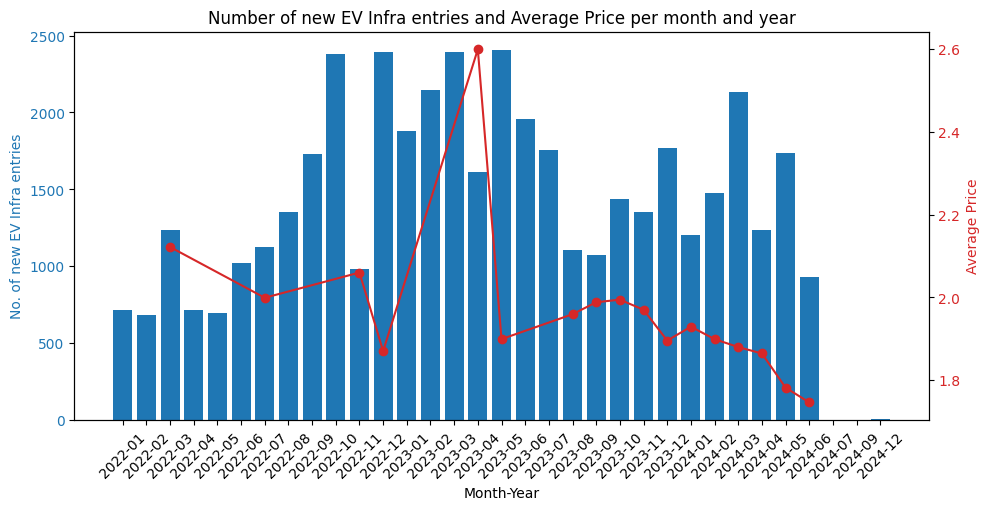

In [19]:
# Overlapping the two plots
fig, ax1 = plt.subplots(figsize=(10, 5))

color = 'tab:blue'
ax1.set_xlabel('Month-Year')
ax1.set_ylabel('No. of new EV Infra entries', color=color)
ax1.bar(entry_counts['year_month'], entry_counts['count'], color=color)
ax1.tick_params(axis='y', labelcolor=color)
ax1.set_xticklabels(entry_counts['year_month'], rotation=45)

ax2 = ax1.twinx()
color = 'tab:red'
ax2.set_ylabel('Average Price', color=color)
ax2.plot(average_prices['year_month'], average_prices['price_value'], marker='o', linestyle='-', color=color)
ax2.tick_params(axis='y', labelcolor=color)

fig.tight_layout()
plt.title('Number of new EV Infra entries and Average Price per month and year')
plt.show()
